## Work
1. 試比較 save_best_only 與否的差異
2. 請僅存入將 save_weights_only 設定為 True, 並嘗試 reset ipynb 並將模型與權重重新建回並預測 x_test

In [1]:
import os
import keras

# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
from keras.layers import BatchNormalization

def build_mlp(input_shape, output_units=10, num_neurons=[512,256,128]):
    """Code Here
    建立你的神經網路
    """
    
    input_layer = keras.layers.Input(input_shape)
    
    for i , n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units,
                                  activation="relu",
                                  name="hidden_layer"+str(i+1))(input_layer)
            x = BatchNormalization()(x)
        
        else:
            x = keras.layers.Dense(units=n_units,
                                  activation="relu",
                                  name="hidden_layer"+str(i+1))(x)
            x = BatchNormalization()(x)
        
    out = keras.layers.Dense(units=output_units,activation="softmax",name = "output")(x)
        
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    
    return model

In [6]:
"""Code Here
設定超參數
"""

LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = 1024
MOMENTUM = 0.95

In [7]:
# 載入 Callbacks
"""Code Here
設定 callbacks: model checkpoint
"""
from keras.callbacks import ModelCheckpoint

results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""

for tf in [True,False]:
    
    model_ckpt = ModelCheckpoint(filepath="./tmp_"+str(tf)+".h5",
                                monitor="val_loss",
                                save_best_only=tf)
    
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer=keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)
    
    model.fit(x_train, y_train,
             epochs=EPOCHS,
             batch_size=BATCH_SIZE,
             validation_data=(x_test,y_test),
             shuffle=True,
             callbacks=[model_ckpt]
             )
    
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["accuracy"]
    valid_acc = model.history.history["val_accuracy"]
    
    exp = "Save Best Only - " + str(tf)
    results[exp] = {'train-loss': train_loss,
                    'valid-loss': valid_loss,
                    'train-acc': train_acc,
                    'valid-acc': valid_acc}

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
batch_normalization_1 (Batch (None, 512)               2048      
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
batch_normalization_2 (Batch (None, 256)               1024      
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
batch_normalization_3 (Batch (None, 128)               512 

50000/50000 [==============================] - 6s 116us/step - loss: 0.5582 - accuracy: 0.8375 - val_loss: 1.6211 - val_accuracy: 0.4971
Epoch 47/50
50000/50000 [==============================] - 6s 117us/step - loss: 0.5421 - accuracy: 0.8442 - val_loss: 1.6403 - val_accuracy: 0.4953
Epoch 48/50
50000/50000 [==============================] - 6s 117us/step - loss: 0.5251 - accuracy: 0.8494 - val_loss: 1.6598 - val_accuracy: 0.4904
Epoch 49/50
50000/50000 [==============================] - 6s 116us/step - loss: 0.5082 - accuracy: 0.8561 - val_loss: 1.6654 - val_accuracy: 0.4914
Epoch 50/50
50000/50000 [==============================] - 6s 116us/step - loss: 0.4917 - accuracy: 0.8617 - val_loss: 1.6761 - val_accuracy: 0.4968
Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 3072)              0         
____________________________________________________

50000/50000 [==============================] - 6s 116us/step - loss: 0.6409 - accuracy: 0.8036 - val_loss: 1.5698 - val_accuracy: 0.4914
Epoch 42/50
50000/50000 [==============================] - 6s 123us/step - loss: 0.6239 - accuracy: 0.8108 - val_loss: 1.5840 - val_accuracy: 0.4919
Epoch 43/50
50000/50000 [==============================] - 6s 117us/step - loss: 0.6070 - accuracy: 0.8168 - val_loss: 1.5799 - val_accuracy: 0.4969
Epoch 44/50
50000/50000 [==============================] - 6s 117us/step - loss: 0.5890 - accuracy: 0.8253 - val_loss: 1.6081 - val_accuracy: 0.4904
Epoch 45/50
50000/50000 [==============================] - 6s 117us/step - loss: 0.5710 - accuracy: 0.8312 - val_loss: 1.6230 - val_accuracy: 0.4905
Epoch 46/50
50000/50000 [==============================] - 6s 117us/step - loss: 0.5527 - accuracy: 0.8388 - val_loss: 1.6348 - val_accuracy: 0.4914
Epoch 47/50
50000/50000 [==============================] - 6s 118us/step - loss: 0.5381 - accuracy: 0.8439 - val_loss:

In [8]:
# Load back
model_true = keras.models.load_model("./tmp_true.h5")
model_false = keras.models.load_model("./tmp_false.h5")
loss_loadback_true, acc_loadback_true = model_true.evaluate(x_test, y_test)
loss_loadback_false, acc_loadback_false = model_false.evaluate(x_test, y_test)

10000/10000 [==============================] - 1s 102us/step


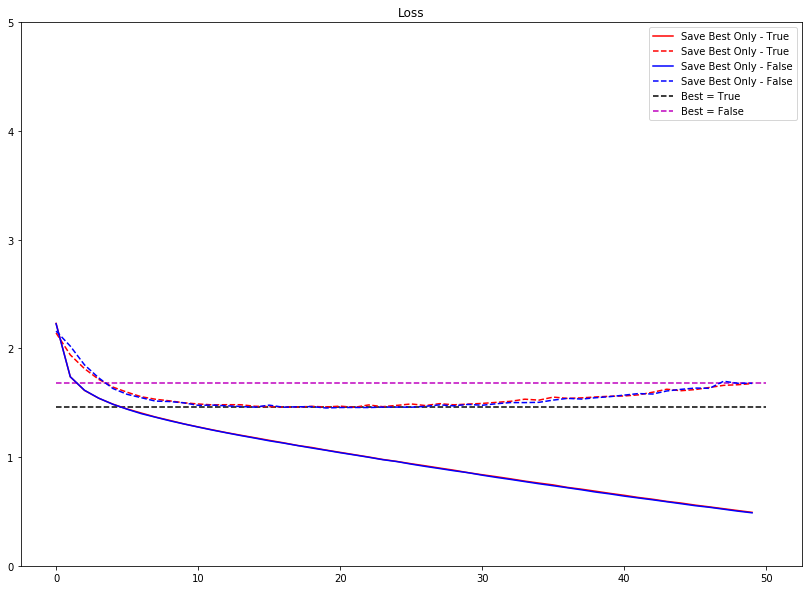

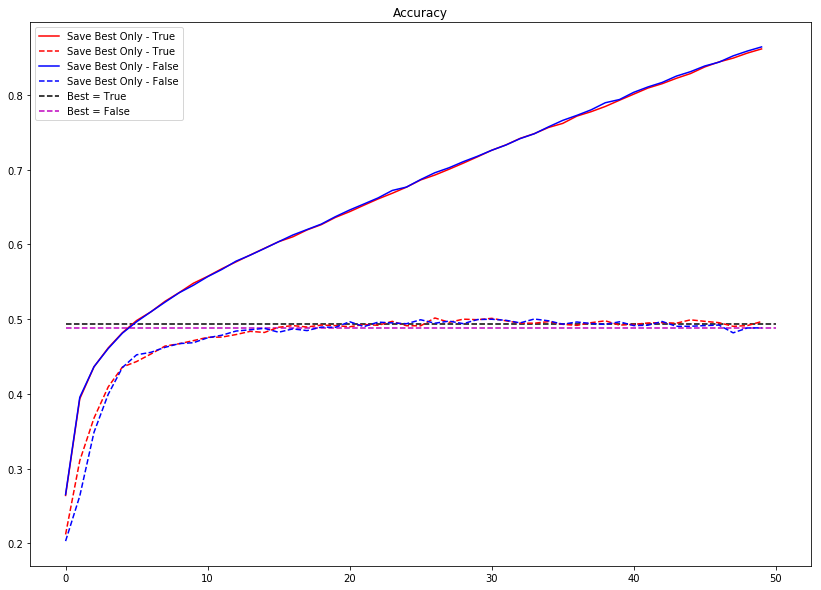

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""

color_bar = ["r", "b"]

plt.figure(figsize=(14,10))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.hlines(y=loss_loadback_true, xmin=0, xmax=len(train_loss), colors='k', linestyles='--',label='Best = True')
plt.hlines(y=loss_loadback_false, xmin=0, xmax=len(train_loss), colors='m', linestyles='--',label='Best = False')
plt.title("Loss")
plt.ylim([0, 5])
plt.legend()
plt.show()

plt.figure(figsize=(14,10))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.hlines(y=acc_loadback_true, xmin=0, xmax=len(train_loss), colors='k', linestyles='--',label='Best = True')
plt.hlines(y=acc_loadback_false, xmin=0, xmax=len(train_loss), colors='m', linestyles='--',label='Best = False')
plt.title("Accuracy")
plt.legend()
plt.show()

In [12]:
model_true

In [16]:
model_true.save('model.h5')
model_true.save_weights('model_weights.h5')

In [17]:
model_true.predict(x_test[0:1])

array([[0.045756  , 0.05592475, 0.32319134, 0.22143912, 0.08393869,
        0.11766303, 0.10242924, 0.00203213, 0.04655721, 0.00106847]],
      dtype=float32)

In [21]:
del model

In [23]:
model = build_mlp(input_shape=x_train.shape[1:])
model.summary()
optimizer=keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)


Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
batch_normalization_7 (Batch (None, 512)               2048      
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
batch_normalization_8 (Batch (None, 256)               1024      
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
batch_normalization_9 (Batch (None, 128)               512 

In [24]:
model.load_weights('model_weights.h5')

In [25]:
model.predict(x_test[0:1])

array([[0.045756  , 0.05592475, 0.32319134, 0.22143912, 0.08393869,
        0.11766303, 0.10242924, 0.00203213, 0.04655721, 0.00106847]],
      dtype=float32)